In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [43]:
df =pd.read_csv('/home/barbaros/Desktop/Aı/Startup/50_Startups.csv')

cols=df.columns.values.tolist()
df.describe().columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [44]:
for col in df.columns:
    values = []
    
    # numerik olmayanlar -> kategorik
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        
        print("{0} -> {1}".format(col, values))

State -> ['New York', 'California', 'Florida']


In [45]:
for i in cols:
    isim=i.split(' ')
    str1=''
    for z in isim:
        str1+=z
    df.rename(columns={i: str1}, inplace=True)


In [46]:
cols = df.columns.values.tolist()
cols =['R&DSpend', 'Administration', 'MarketingSpend', 'State', 'Profit']

In [47]:
for col in df.columns:
    print(col, df[col].nunique())

R&DSpend 49
Administration 50
MarketingSpend 48
State 3
Profit 50


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

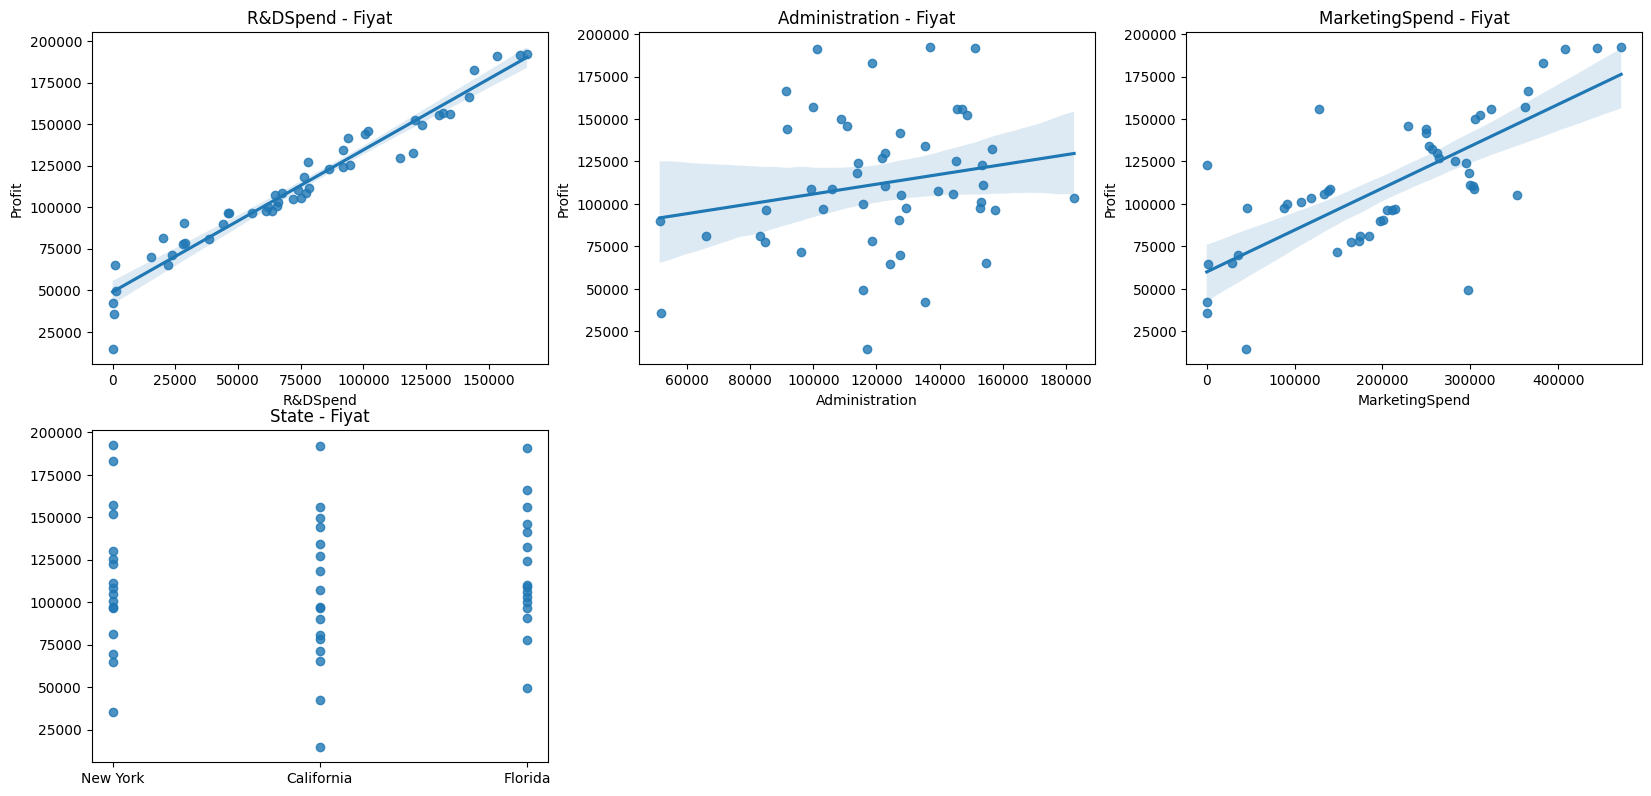

In [48]:

plt.figure(figsize=(20,25))

for i in range(len(cols)):

    u=str(cols[i])
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')

    sns.regplot(x=df[u], y=df['Profit'])
    
plt.tight_layout()


In [ ]:
dummies_list = ['State']
data=df.copy()
for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('data' + '.' + i), drop_first=True)
    
    data = pd.concat([data, temp_df], axis=1)
    
    data.drop([i], axis=1, inplace=True)

train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)

In [ ]:
train_data.head()

,R&DSpend,Administration,MarketingSpend,Profit,Florida,New York
6,134615.46,147198.87,127716.82,156122.51,0,0
41,27892.92,84710.77,164470.71,77798.83,1,0
46,1315.46,115816.21,297114.46,49490.75,1,0
47,0.00,135426.92,0.00,42559.73,0,0
15,114523.61,122616.84,261776.23,129917.04,0,1


In [ ]:
scaler= MinMaxScaler()
data.columns=data.columns.str.lower()
cols=['r&dspend', 'administration', 'marketingspend', 'profit', 'florida',
       'new york']
data.describe().columns


Index(['r&dspend', 'administration', 'marketingspend', 'profit', 'florida',
       'new york'],
      dtype='object')

In [ ]:
for i in cols:
    isim=i.split(' ')
    str1=''
    for z in isim:
        str1+=z
    data.rename(columns={i: str1}, inplace=True)

In [ ]:
scale_cols=['r&dspend', 'administration', 'marketingspend']
train_data[scale_cols]=scaler.fit_transform(train_data[scale_cols])
train_data.head()

,R&DSpend,Administration,MarketingSpend,Florida,New York
6,0.814128,0.696252,0.270710,0,0
41,0.168691,0.160782,0.348614,1,0
46,0.007956,0.427329,0.629768,1,0
47,0.000000,0.595376,0.000000,0,0
15,0.692617,0.485605,0.554864,0,1


In [ ]:
y_train=train_data['Profit']
X_train=train_data
y_train.head()

KeyError: 'Profit'